Assignment 6: Testing Assumptions (Heavily modeled after Grelliam's Example Assignment)

Team Fatboys: Edric Tam, Kevin Huang, Ivan Kuznetsov

- State assumptions
- Check assumptions (with figures)
 - correlations
 - number of modes
 - (residuals)


**State Assumptions:**
We assume that integrated brightness features of all 24 markers are sampled according to: $x_i
\stackrel{iid}{\sim}F$. This is both an independent and identical assumption.


    

**Check Assumptions:**
To check independence, check that off diagonal correlation is approximately 0. 
To check indenticality, check that the optimal number of clusters is approximately 1 under GMM model.
We also plot the residuals under linear regression model just for fun. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pickle

%matplotlib inline

np.random.seed(12345678)  # for reproducibility, set random seed
r = 24  # define number of rois

dataFile = open('local_brightness.p')
realData = pickle.load(dataFile)
numSubject = len(realData[3])
features = np.empty([r,numSubject])

for i in range(0,r):
    for j in range(0,numSubject):
        features[i,j]= realData[i+1][j]
X = np.array(features).T
X = X[0:1000,:]

/Users/saltpisces/Desktop/School/Genomics/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Code for Correlation Matrix**

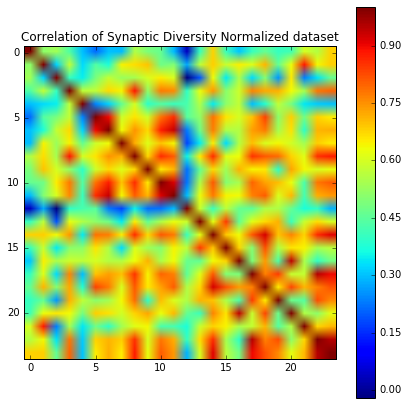

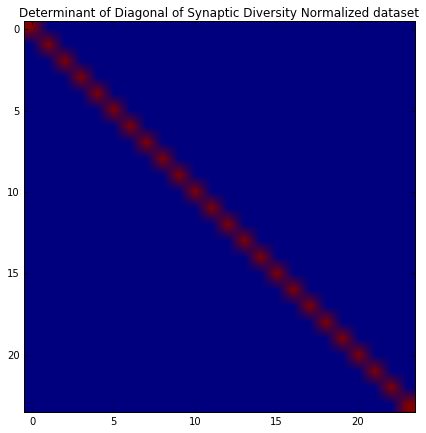

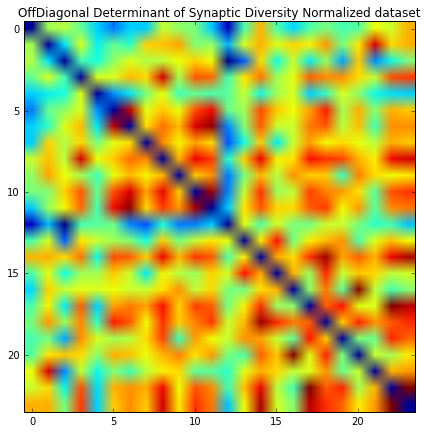

Ratio of on- and off-diagonal determinants: -297.850882663


In [5]:
corrMatrix = np.empty([r,r])
for i in range(0,r):
    for j in range(0,r):
        results = np.corrcoef(X[i,:],X[j,:])
        corrMatrix[i,j] = results[1,0]

plt.figure(figsize=(7,7))
plt.imshow(corrMatrix)
plt.title('Correlation of Synaptic Diversity Normalized dataset')
plt.colorbar()
plt.show()

diagonal = corrMatrix.diagonal() * np.eye(corrMatrix.shape[0])
offDiagonal = corrMatrix - diagonal
detDiag = np.linalg.det(diagonal)
detOffDiag = np.linalg.det(offDiagonal)

plt.figure(figsize=(7, 7))
plt.imshow(diagonal)
plt.title('Determinant of Diagonal of Synaptic Diversity Normalized dataset')

plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(offDiagonal)
plt.title('OffDiagonal Determinant of Synaptic Diversity Normalized dataset')

plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(detDiag / detOffDiag)

**Find Optimal Number of Clusters**

[ 1  2  3  4  5  6  7  8  9 10]
Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.


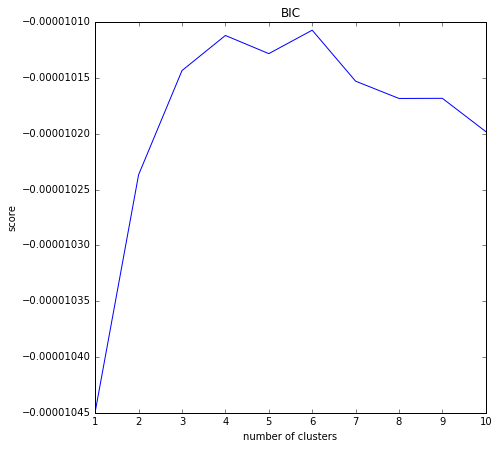

[-95701.93275338 -97687.93156144 -98586.9013531  -98893.53505476
 -98734.60377313 -98939.78173009 -98494.66085697 -98344.55835624
 -98345.67609019 -98058.17894654]


In [26]:
import sklearn.mixture
i = np.linspace(1,10,10,dtype='int')
print i
bic = np.array(())
for idx in i:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag')
    gmm.fit(X)
    bic = np.append(bic, gmm.bic(X))
plt.figure(figsize=(7,7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

**Residuals** (for different features trying to predict based on glutamatergic label)

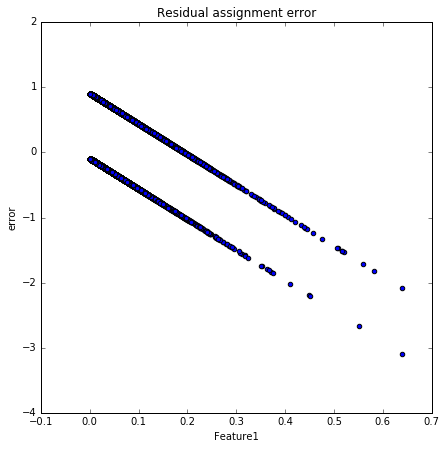

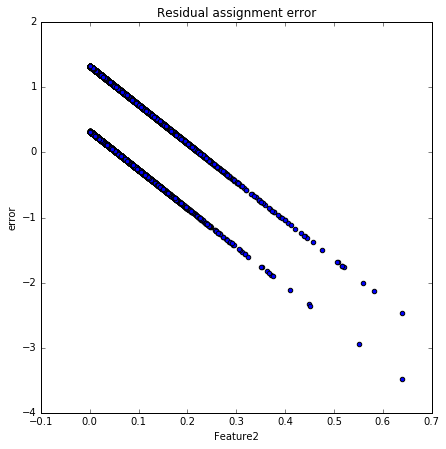

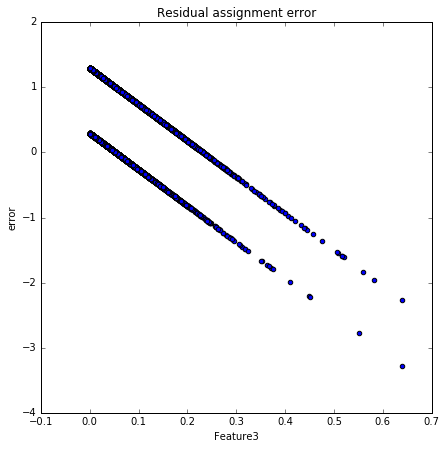

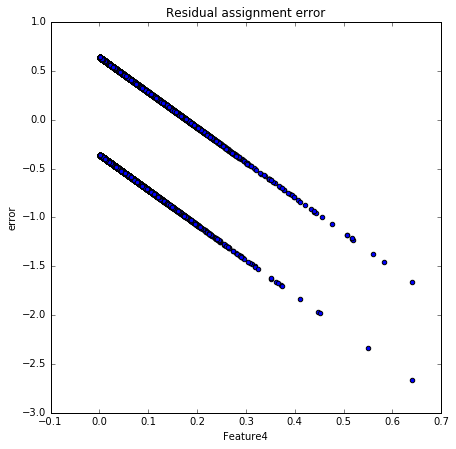

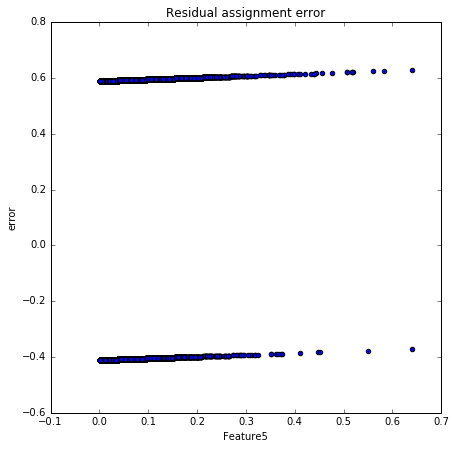

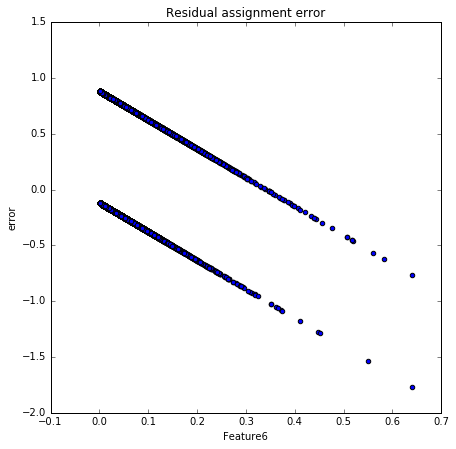

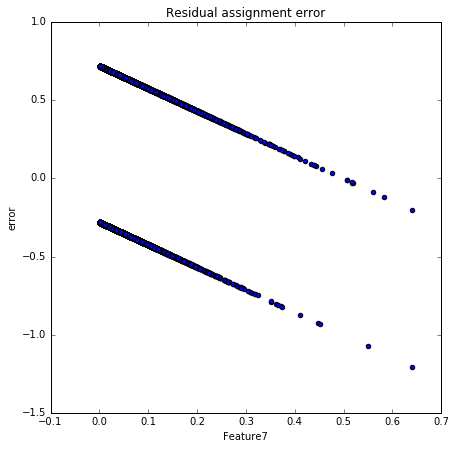

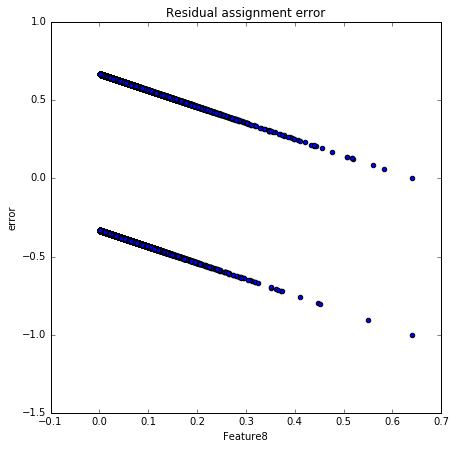

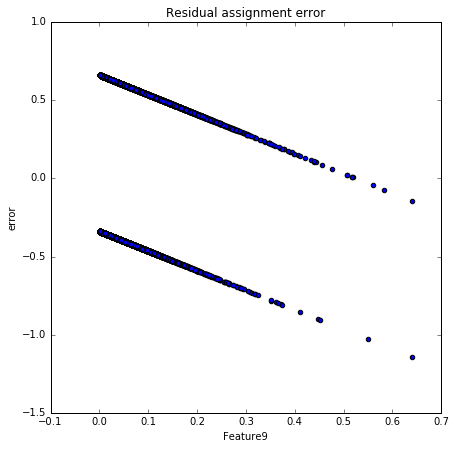

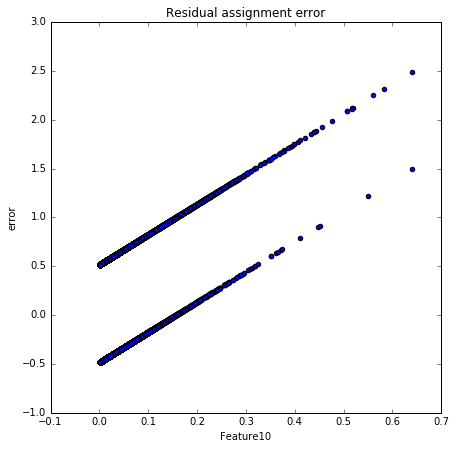

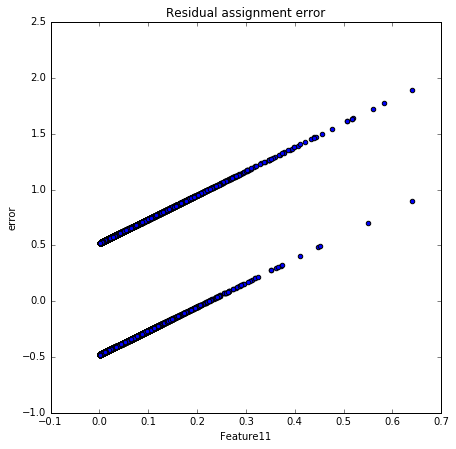

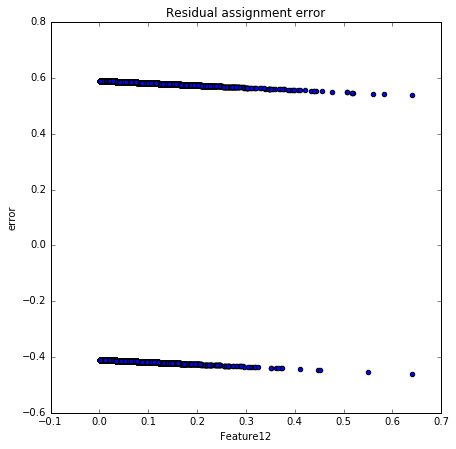

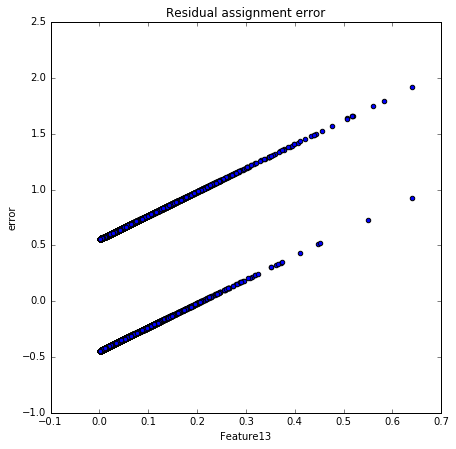

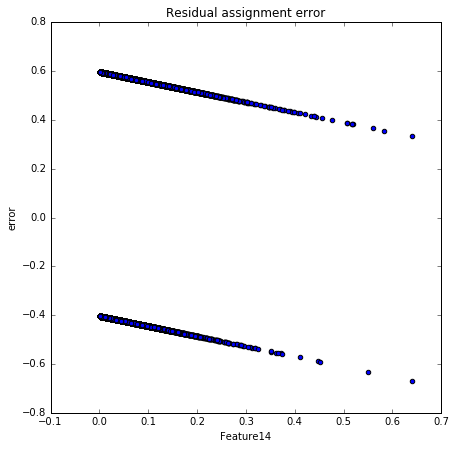

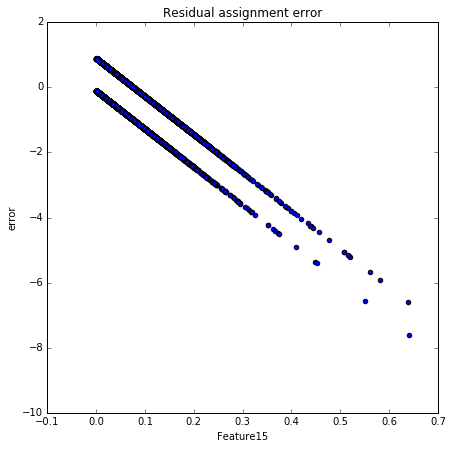

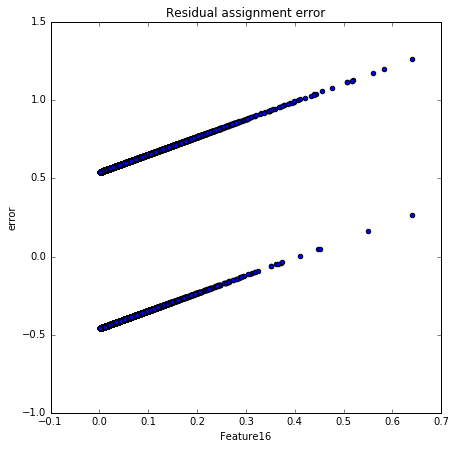

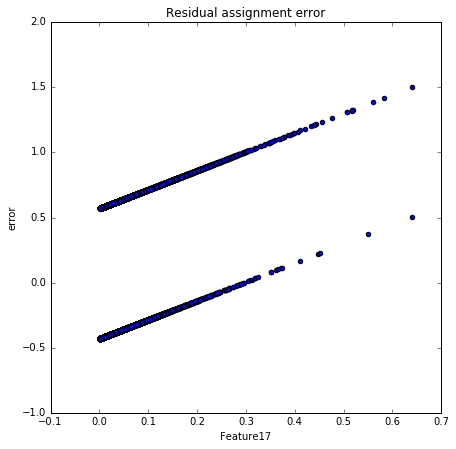

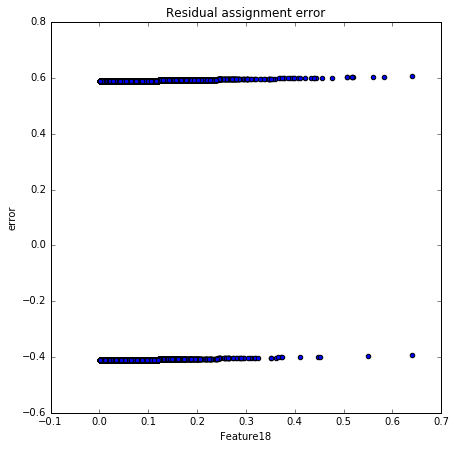

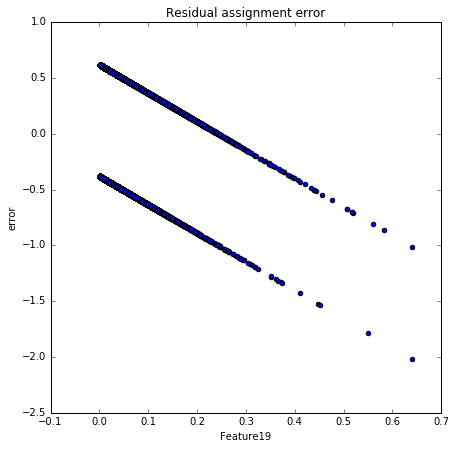

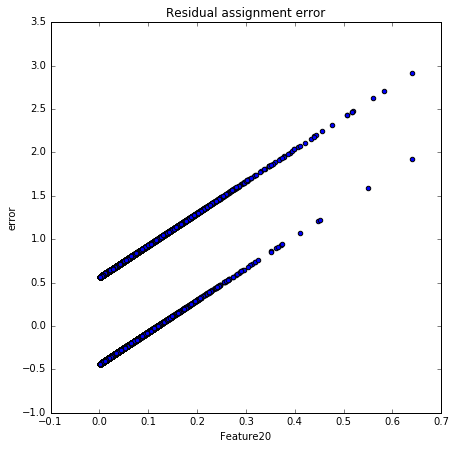

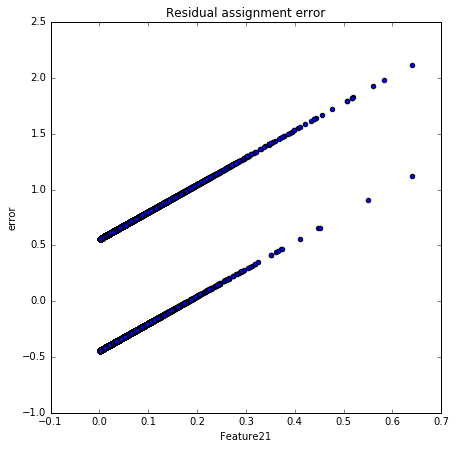

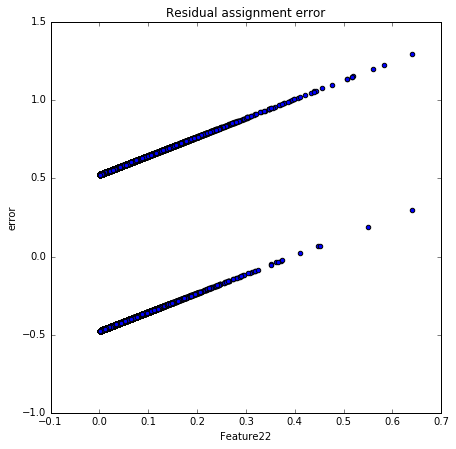

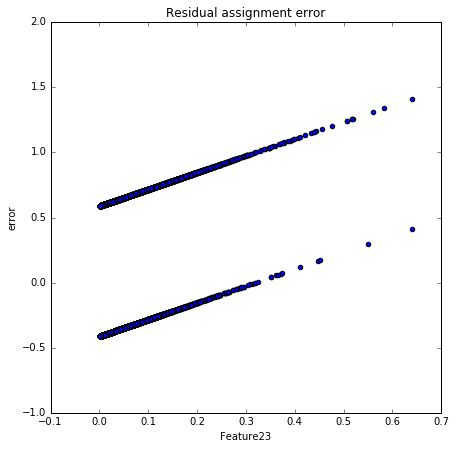

In [25]:
import scipy.stats as ss

labels = realData[3]
numSubject = len(labels)
thresholdReal = np.mean(labels)
Y= [(i > thresholdReal) for i in labels]
y = Y[0:1000]
y = np.array(y)

def comp_value(m, c, data):
    return m.T*data + c

for q in range(1,24):
    vals = ss.linregress(X[:,q], y)
    m = vals[0]
    c = vals[1]
    resi = np.array(())
    for idx, subj in enumerate(y):
        temp = comp_value(m, c, X[idx])
        resi = np.append(resi, subj - temp)
    plt.figure(figsize=(7,7))
    plt.scatter(X, resi)
    plt.title('Residual assignment error')
    plt.xlabel('Feature' + str(q))
    plt.ylabel('error')
    plt.show()

**Conclusions:**
1. Our features are not independently distributed since there are many offdiagonal correlations that are highly correlated according to matrix. 
2. Our features are not identically distributed since there are more than 1 clusters according to the GMM fitting model.
3. Residuals indicate that our classifier fails pretty badly in general. 